# Comparison audit calculations for Bristol Audit
Used to check 6 ballot stats output with seed 1 using example intepretations 

For these 6 ballots candidate 1 was chosen for all contest in the first 5 ballots.
Candidate 2 was chosen for the last ballot.

In [95]:
from math import log, ceil

In [96]:
reported_results_bristol = [
      {'contest_id': 'senator',
        'results': [
          {'candidate': 'DEM Sheldon Whitehouse',
           'proportion': 0.595, # shouldn't be needed at all
           'votes': 5367
          },
          {'candidate': 'REP Robert G. Flanders Jr.',
           'proportion': 0.389,
           'votes': 3506
          },
          {'candidate': 'Write-in',
           'proportion': 0.002,
           'votes': 19
          },
          {'candidate': 'undervote',
           'proportion': 0.014,
           'votes': 127
          },
          {'candidate': 'overvote',
           'proportion': 0.0002,
           'votes': 2
          }
          ]},
    ]

## Website output Senator
From reported_results_bristol the reported winner is 'DEM Sheldon Whitehouse' 
losing candidate with votes in audit is 'REP Robert G. Flanders Jr.'
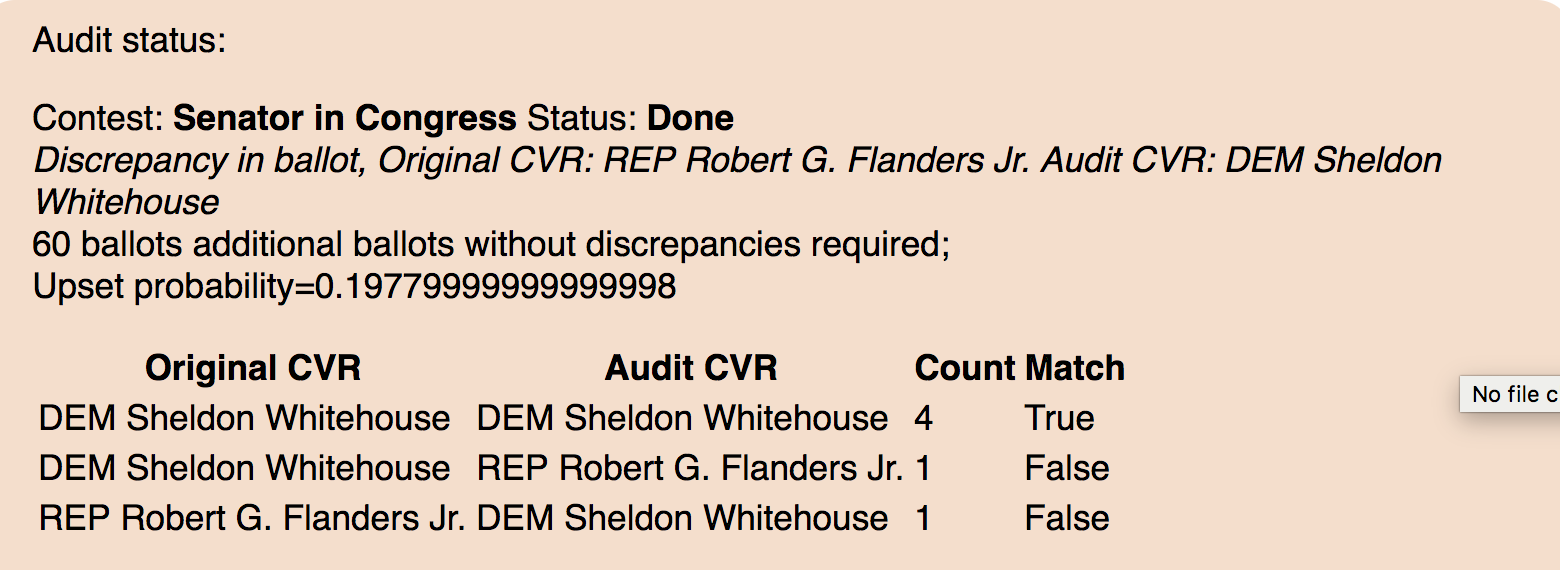

In [97]:
#From discrepancy table: 1 2-vote overstatement  
u1 = 1 
u2 = 0
o1 = 0
o2 = 1

In [98]:
# m: "diluted margin" smallest margin in votes / total number of the ballots
#     i.e. difference in porportion of ballots (with rounding)
m =   0.595 -  0.389
# g: i.e. inflator
g = 1.03905
# a: risk limit
a = 0.05

In [99]:
#stopping sample size = -2g(log(a) + o1log(1-1/(2g)) + o2log(1 - 1/g) + u1log(1+1/(2g)) + u2log(1+1/g)) / m)
#    round up to nearest whole number
stopping_sample_size = ceil (-2*g *(log(a) \
                              + o1*log(1-1/(2*g)) \
                              + o2*log(1-1/g) + \
                              u1*log(1+1/(2*g)) + \
                              u2*log(1+1/g))/ m )
print("Stopping sample size: %d" % stopping_sample_size)

Stopping sample size: 60
